#### Student Performance Indicator

##### Life cycle of Manchine learning Project
- Understanding the problem Statement
- Data collection
- Data checks to perform
- Exploratory data analysis
- Data Pre-processing
- Model Training
- Choose best model

#### 1) Problem Statement
- This peoject understands how the students performance (test scores) is affected by other variables such as Gender, Ethenicity, Parental level of educcation, lunch and test preparation course

#### 2) Data Collection
- Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 cols and 1k rows.

#### 2.1 Import Data and Required Packages
##### Importing Pandas. Numpy, Matplotlib, Seaborn and Warings Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


##### Import the csv Data as Pandas DataFrame

In [6]:
df = pd.read_csv(r'data/stud.csv', sep='\t')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of the dataset

In [7]:
df.shape

(1000, 8)

##### 2.2 Dataset information
- Gender: sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score
##### 3.0 Data Checks to perform
- Check missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of a dataset
- Check various categories present in the different categorical column
##### 3.1 Check missing values

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no missing values

##### 3.2 Check Duplicates

In [12]:
df.duplicated().sum()

np.int64(0)

##### 3.3 Check data types

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Checking the number of unique values of each column 

In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### 3.5 Check statistics of dataset

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


##### Insight
- From above description of numerical data, all means are very close to each other - between 66and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much highger = 10 and for reading myet higher = 17
##### 3.7 Exploring Data

In [18]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())
print()
print("Categoris in 'race_ethnicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())
print()
print("Categories in 'parent_level_of_education' variable: ", end=" ")
print(df['parental_level_of_education'].unique())
print()
print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())
print()
print("Categories in 'test_preparation_course' variable: ", end=" ")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:  ['female' 'male']

Categoris in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parent_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable:  ['standard' 'free/reduced']

Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [22]:
# define numerical & categorical cols
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

print(f"We have {(len(numeric_features))} numerical features: {numeric_features}")
print(f"We have {len(categorical_features)} numerical features: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 numerical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


##### 3.8 Adding columns for "Total Score" and "Average"

In [23]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
# Students with full score
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [ ]:
# Students with score below 20%
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


##### Insights
- From the results above we get the students have performed poorly in Maths
- Best performance is in reading
##### 4 Exploring Data (Visualization)
##### 4.0 Visuaize average score distribution to make some conclusion
- Histogram
- Kernel Distribution (KDE)
##### 4.1 Hstogram & KDE

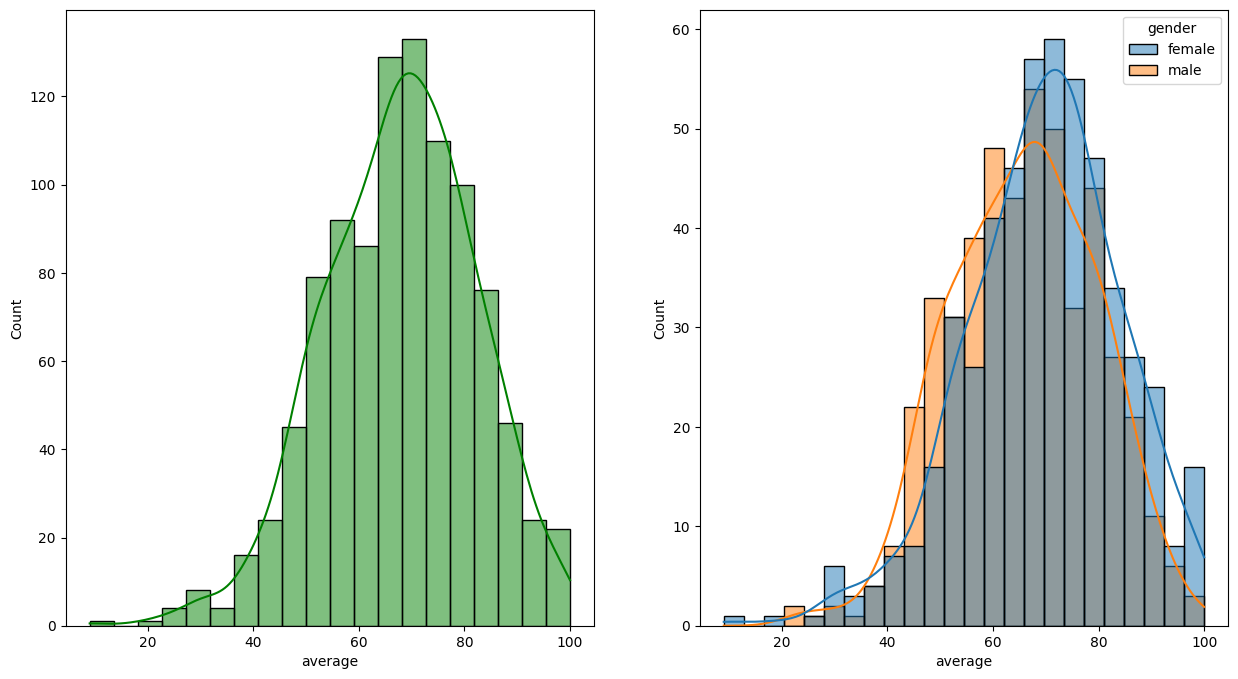

In [26]:
# Histogram plot & KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

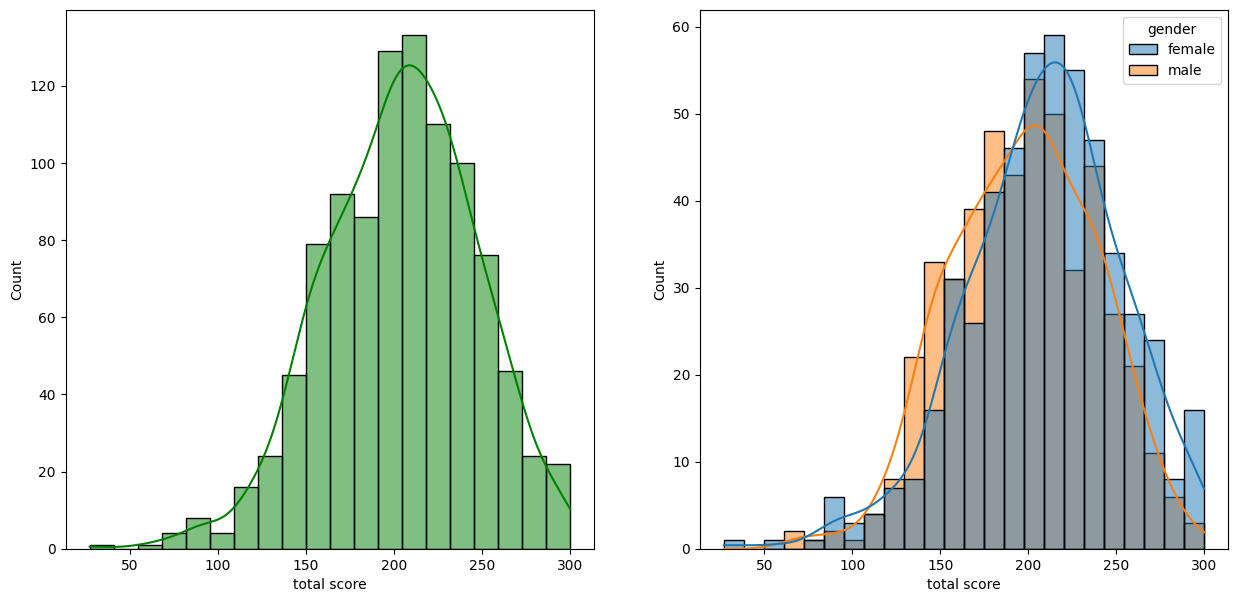

In [27]:
# Histogram plot on total score

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

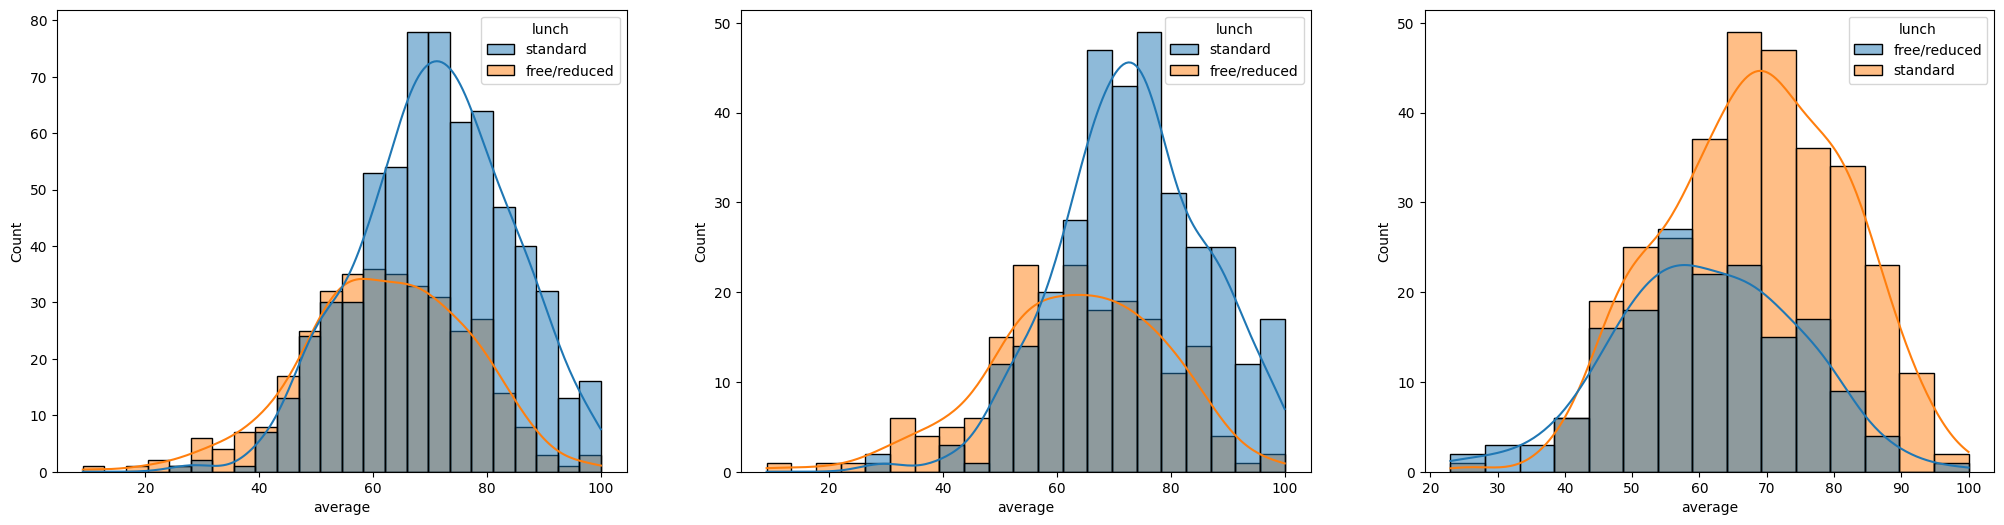

In [32]:
# How lunch categories impact the genders performance & their average score

plt.subplots(1, 3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

##### Insights
- Students on standard lunch perform better for both male & female students

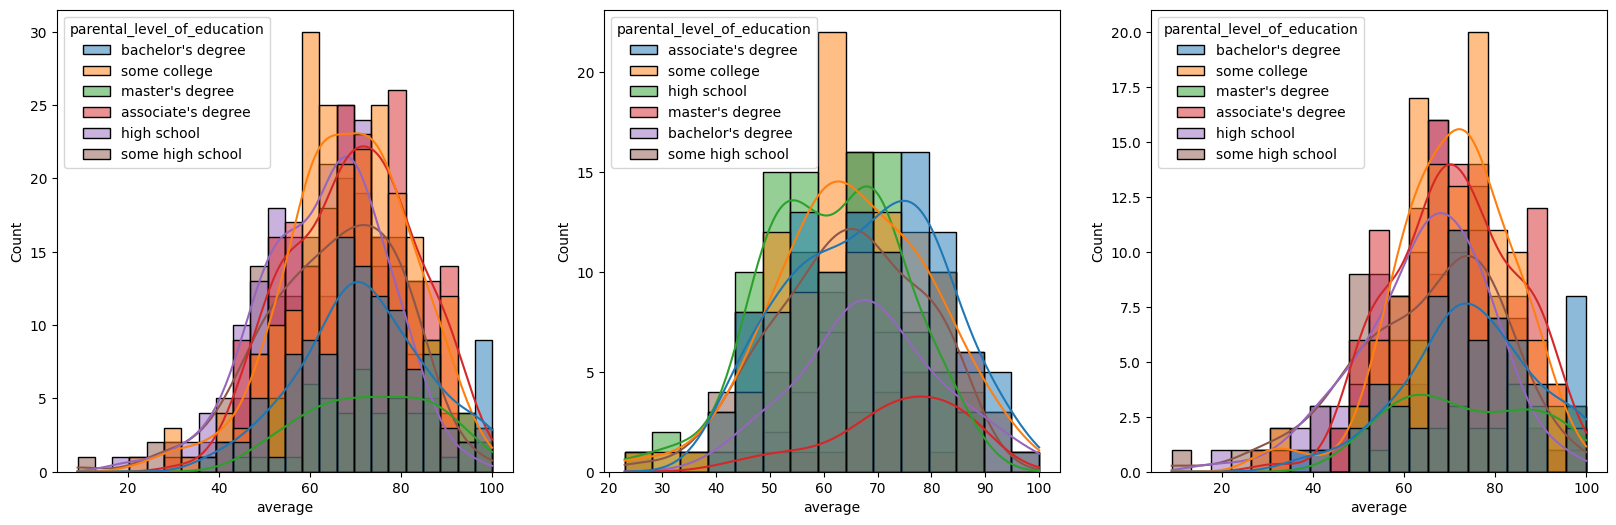

In [34]:
# How parental level of education impact the genders performance & their average score
plt.subplots(1,3,figsize=(20,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

##### Insights
- Generally parents education does not help student perform better in exam
- Second plot show that parents withassociate degree or masters degree male child tend to perform well
- third plot show no effectof parents education on female students

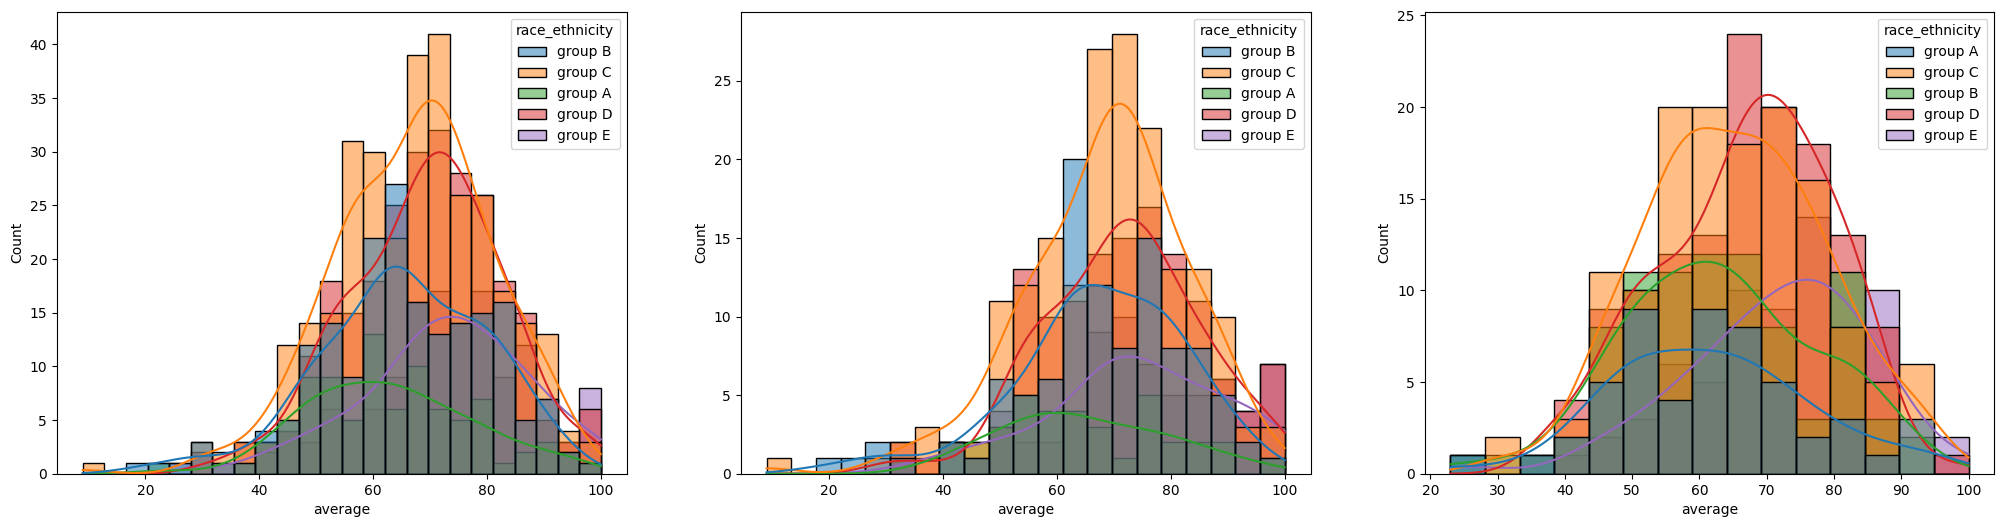

In [35]:
# How race_ethencity affect performance
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

##### Insights
- Students of group A and group B tend to perform poorly in exams irrespective of their gender.

#### 4.2 Maximum score of students in all three subjects

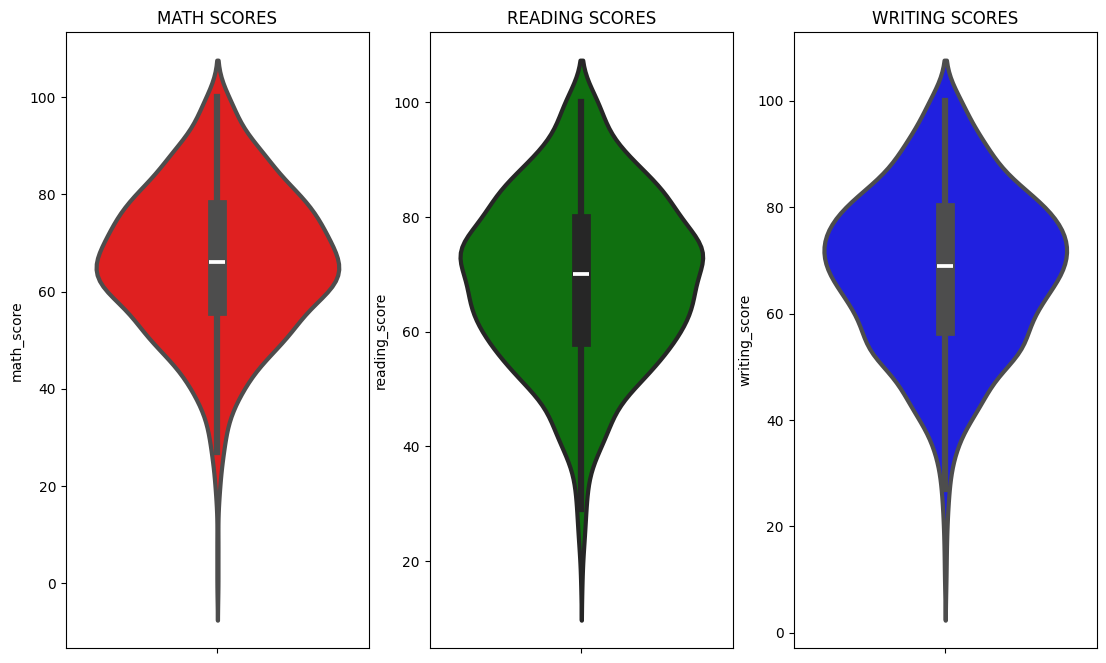

In [37]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

##### Insights
- From above plots most students score between 60 - 80 in Maths where as in reading and writing most score between 50 - 80.

#### 4.3 Multivariate analysis using pieplot

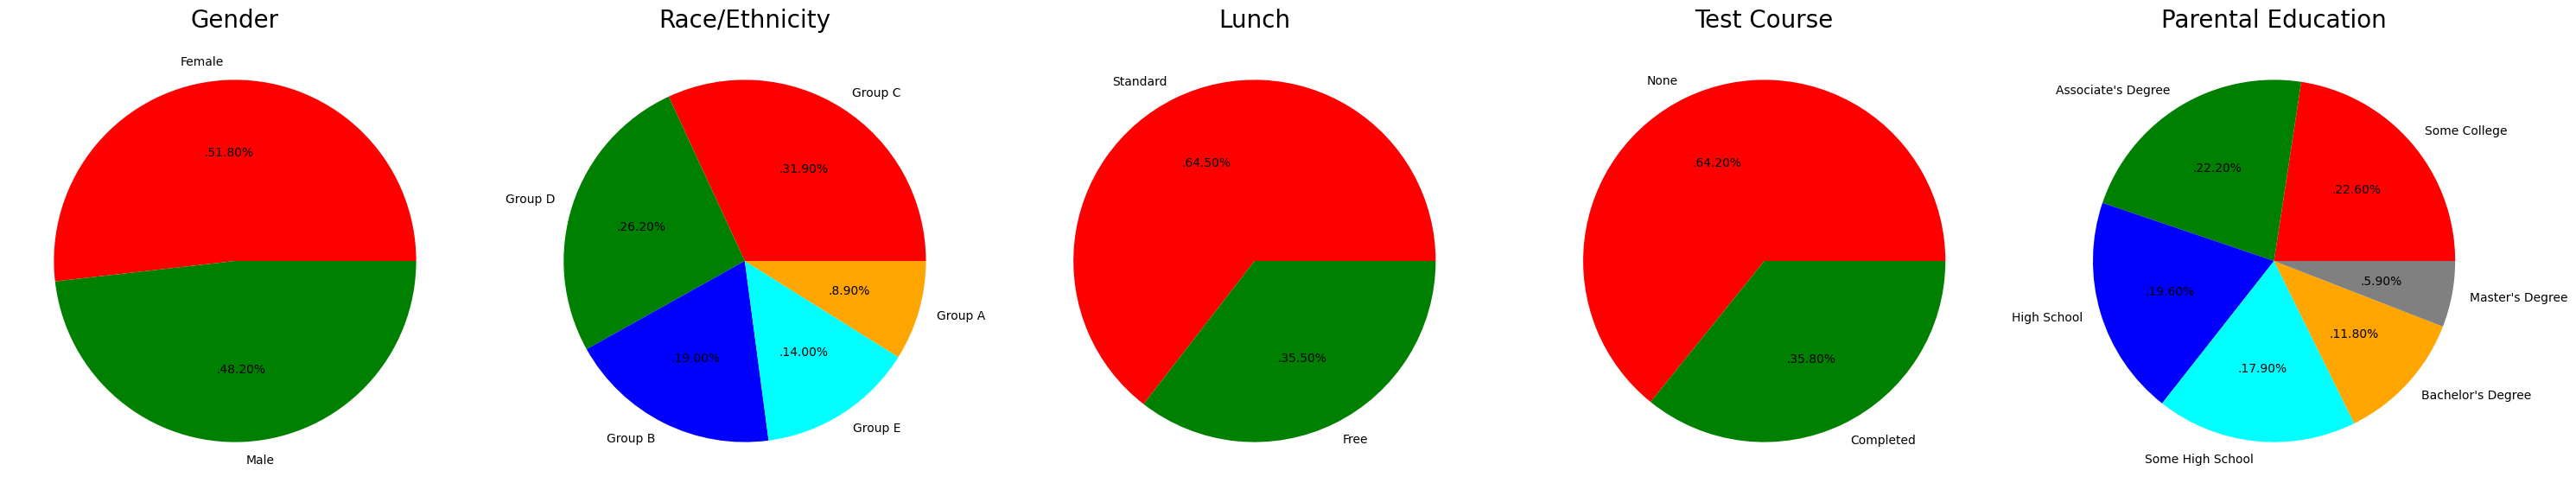

In [47]:

plt.rcParams['figure.figsize'] = (30, 15)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

##### Insights
- Number of male and female students almost equal
- Number of students are greatest in Group C
- Number of students who have standard lunch are greater
- No of students not enrolled in any test preparation course is high
- No of students whose parental level of education is 'Some college' is greater followed closely by  those with "Associate's Degree".

#### 4.4 Feature Wise Visualization

#### 4.4.1 GENDER COLUMN
- How is distribution of Gender?
- Does gender have any impact on students performance

##### UNIVARIATE ANALYSIS(How is distribution of Gender)

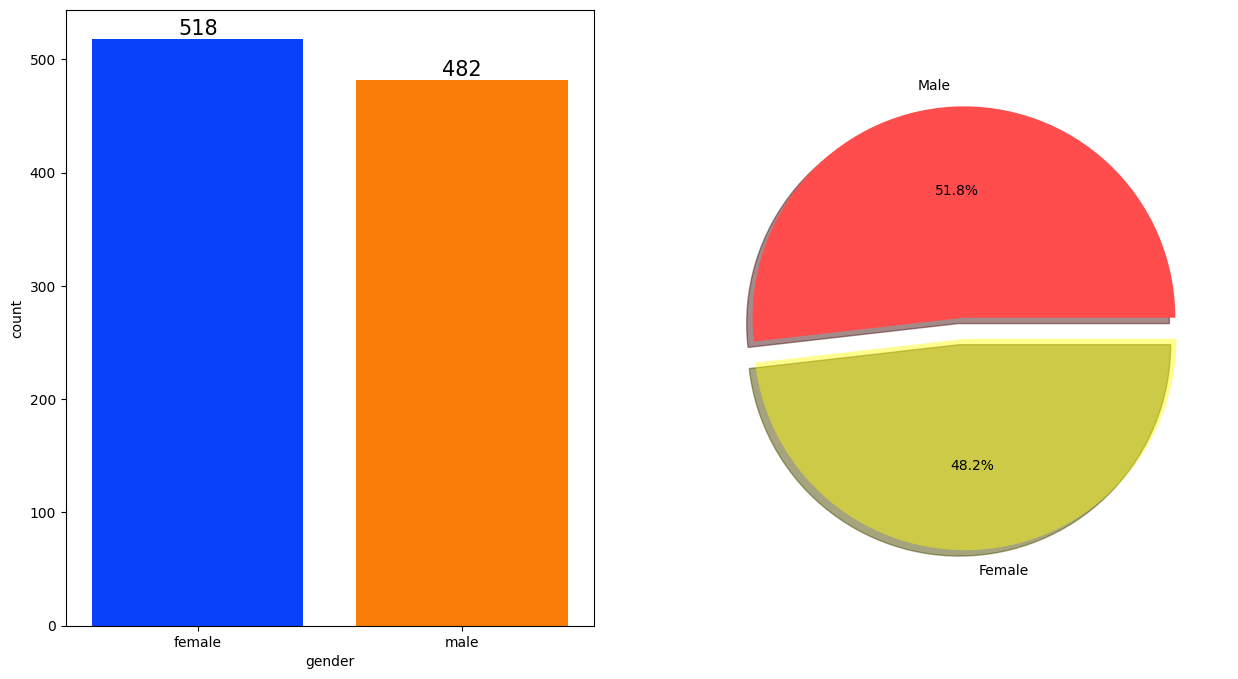

In [45]:

f,ax=plt.subplots(1,2,figsize=(15,8))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=["#ff4d4d","#fffb0070"])
plt.show()

##### Insights
- Gender has balanced data with females at 518(48%) and males at 482(52%).

##### BIVARIATE ANALYSIS(Does gender have any impact on students performance)

In [52]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


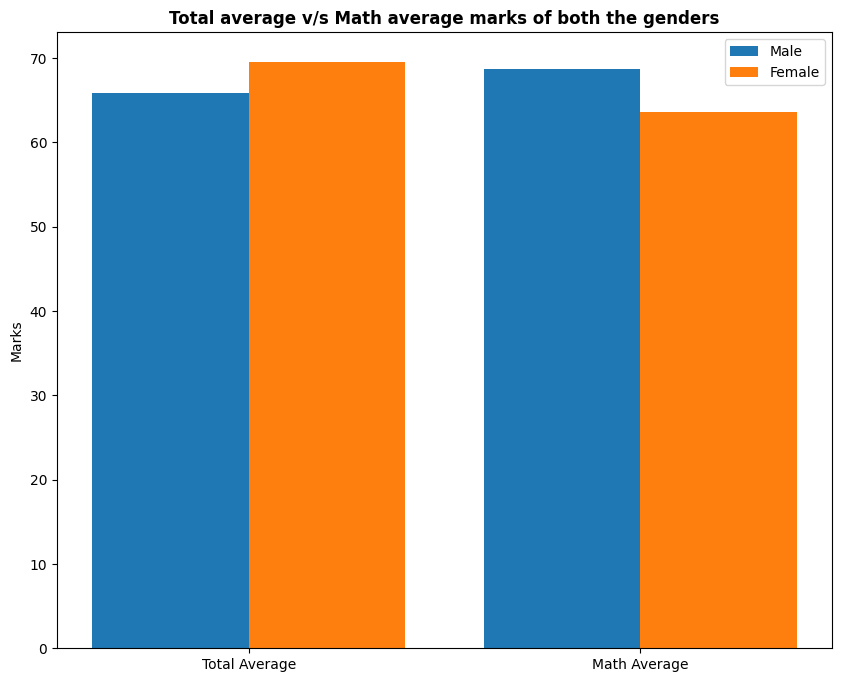

In [54]:

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

##### Insights
- On average females have better overall score while males have a higher score in Maths.

##### 4.4.2 RACE_ETHNICITY COLUMN
- How is Group wise distribution
- Does Race_ethnicity have an impact on students performance

##### UNIVARIATE ANALYSIS(How is group wise distribution?)

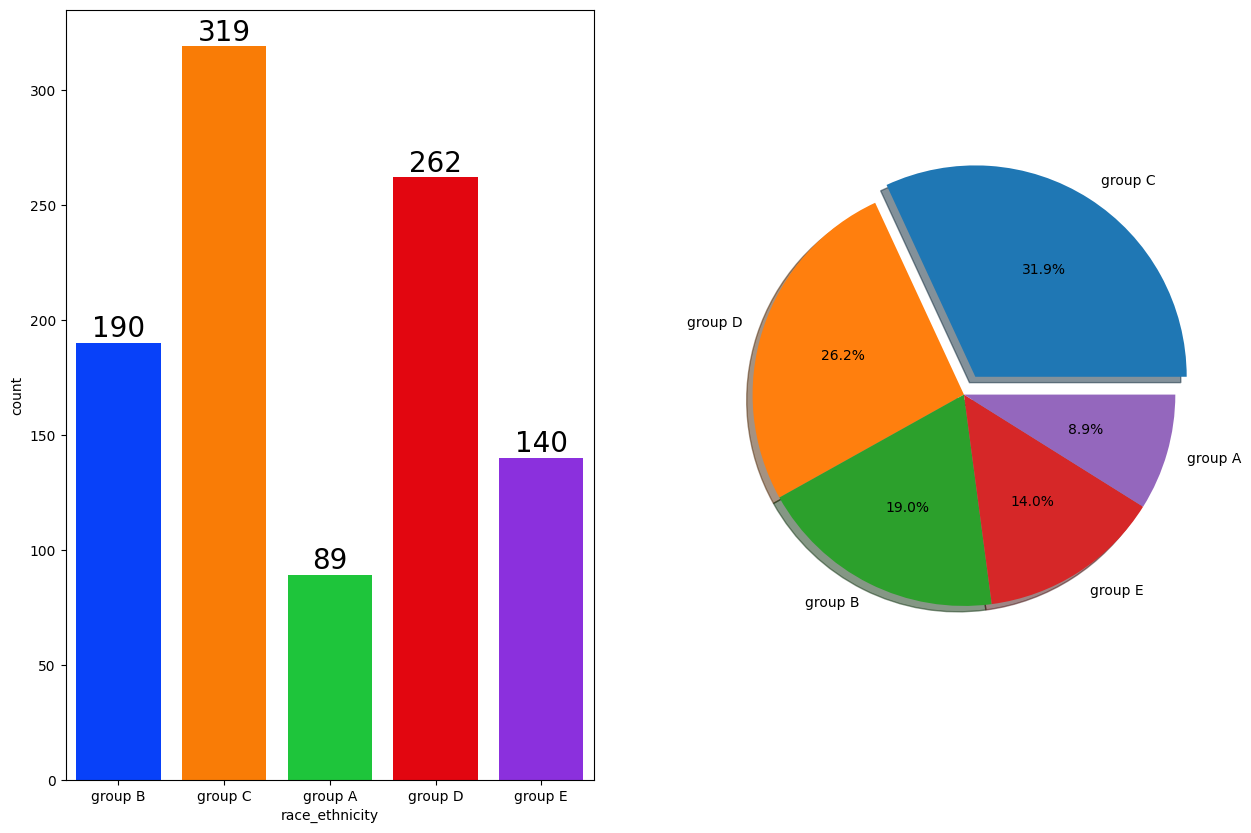

In [56]:
# Group-wise distribution
f,ax=plt.subplots(1,2,figsize=(15,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

##### Insights
- Most students belong to Group C or D
- Lowest no of students are those of group A

##### BIVARIATE ANALYSIS(Does race_ethnicity have any impact on students performace?)

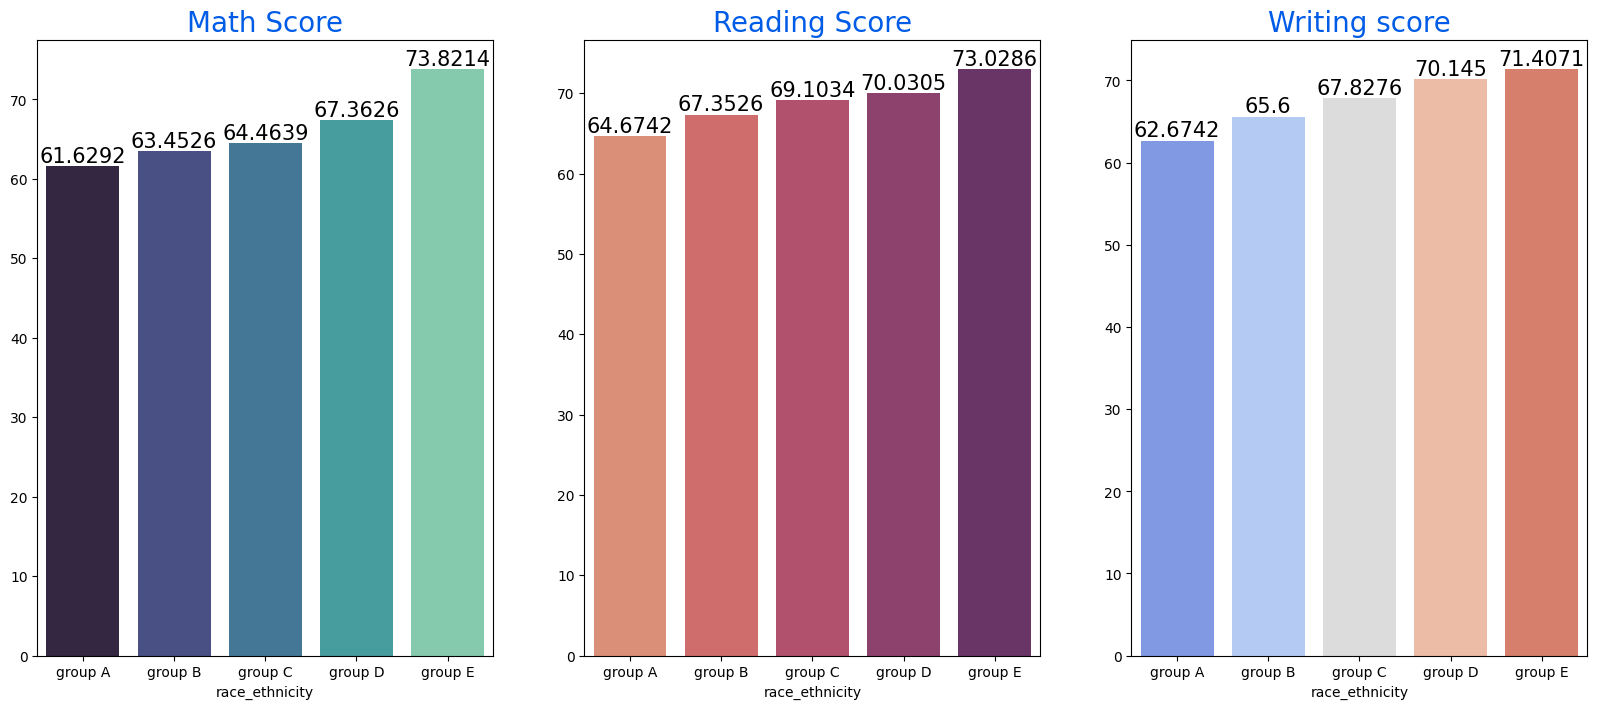

In [57]:

Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math Score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading Score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

##### Insights
- Group E have the highest marks while Group A have the lowest marks in all categories
- Students from a lower Socialeconomic status have a lower avg in all course subjects

##### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of students parents?
- Does parental education have any impact on students performance?

##### UNIVARIATE ANALYSIS(What is educational background of students parents?)

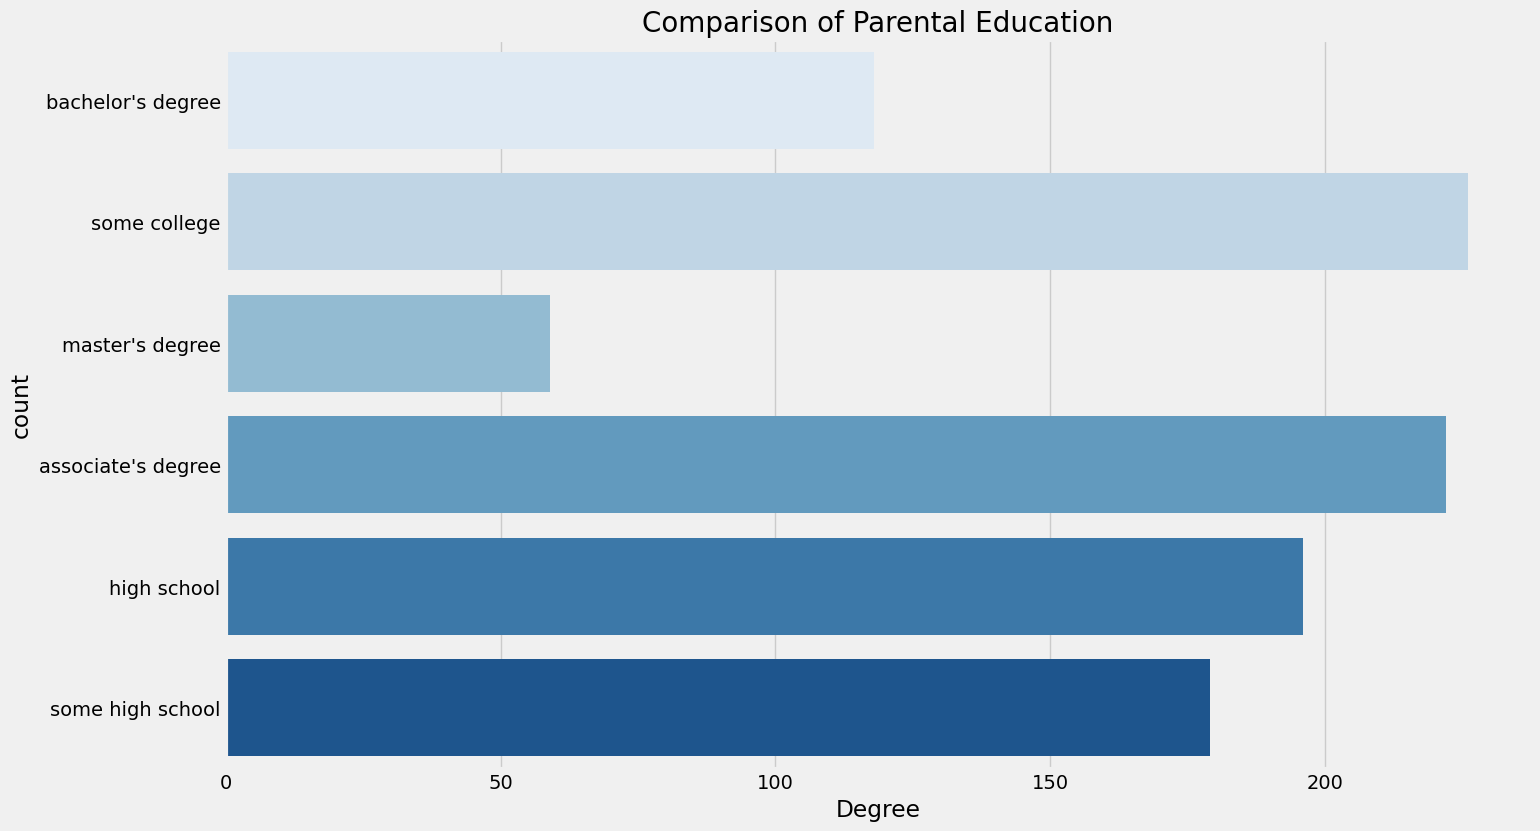

In [58]:
# Parents educational background effect
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

##### BIVARIATE ANALYSIS(Does parents educational background have an effect on students performance?)

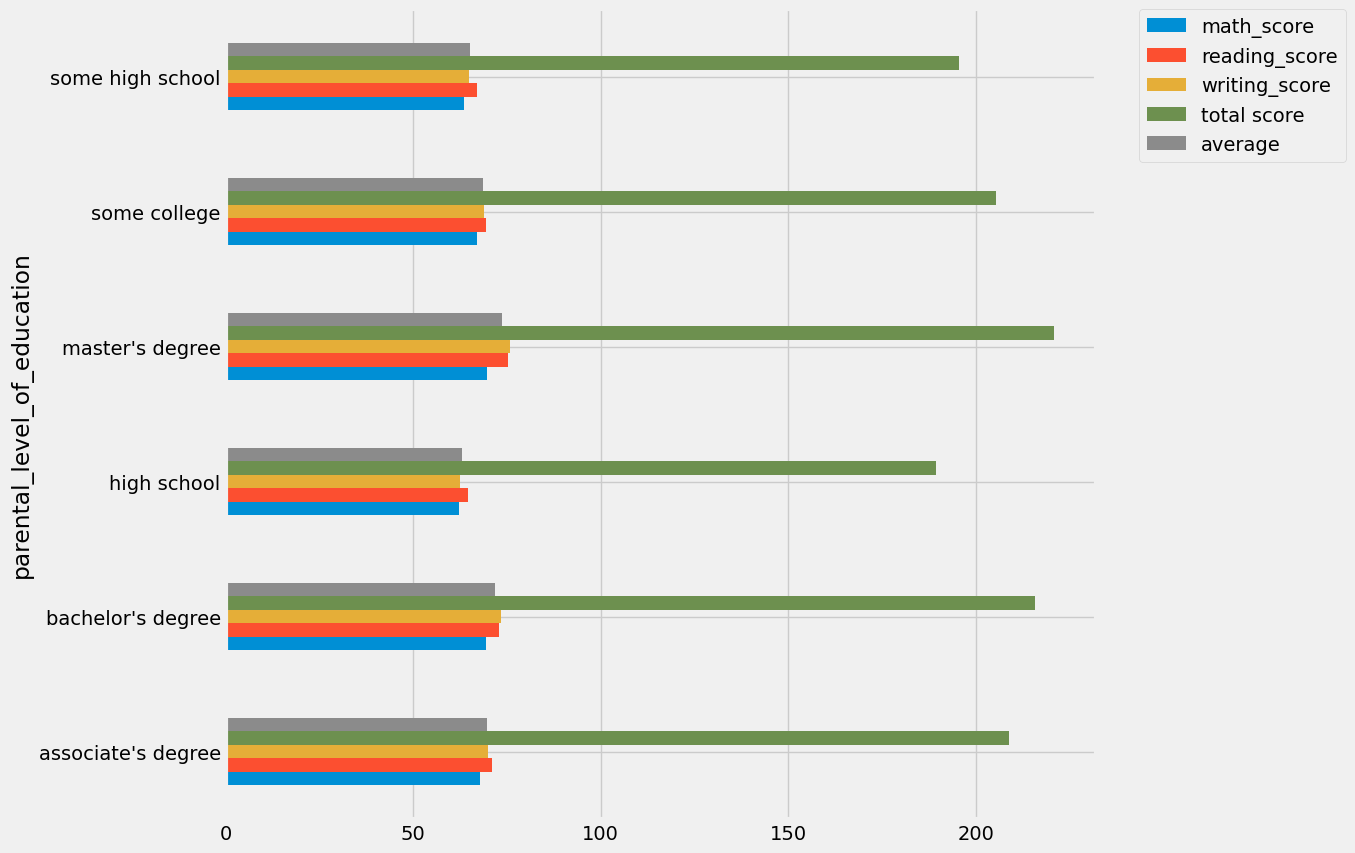

In [61]:

df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common among students?
- What is the effect of lunch type on test results?

##### UNIVARIATE ANALYSIS(Common lunch type among students)

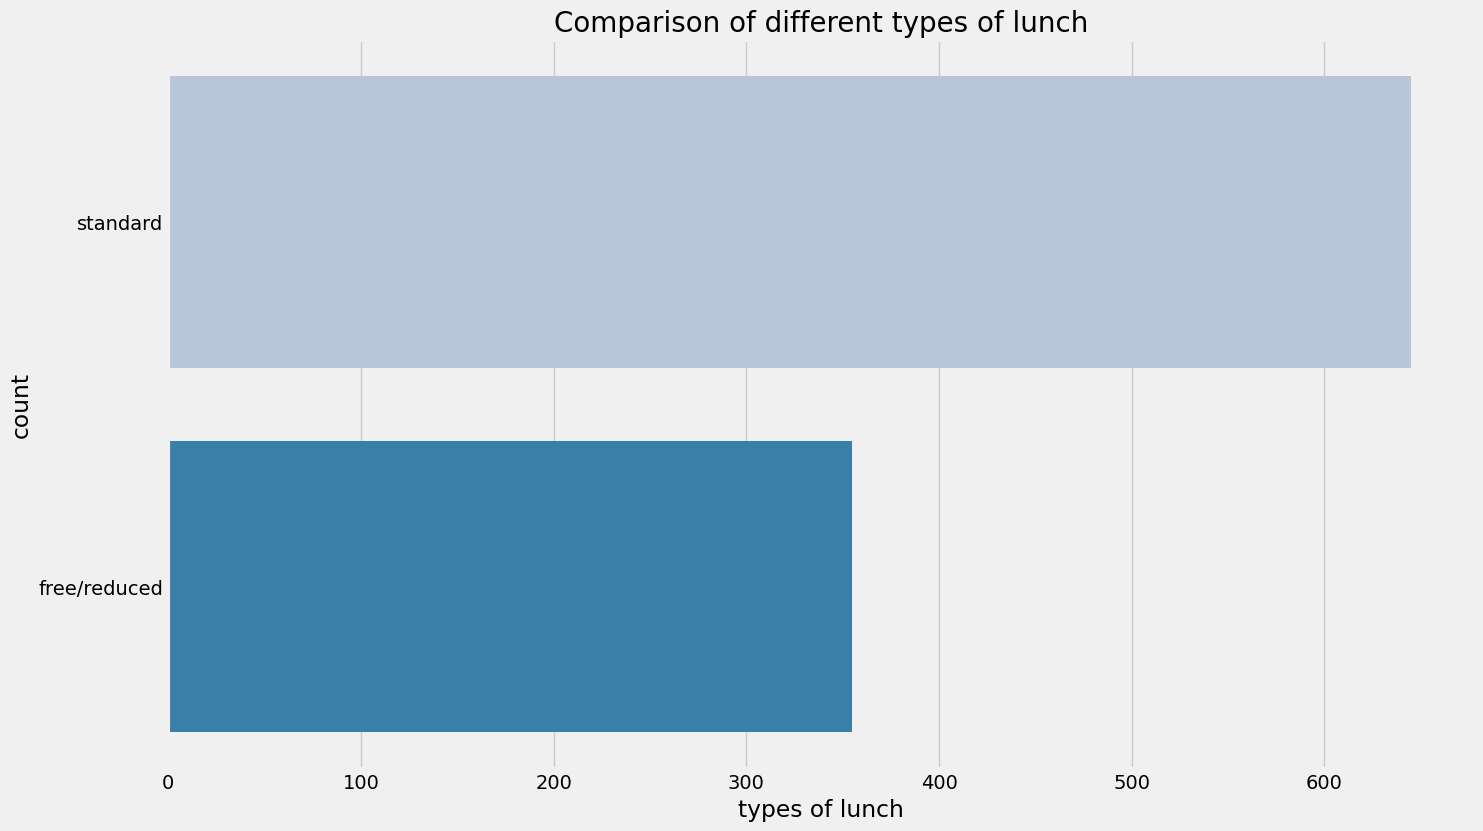

In [64]:
# Common lunch type
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()


##### BIVARIATE ANALYSIS(Does lunch type have an impact on students performance?)

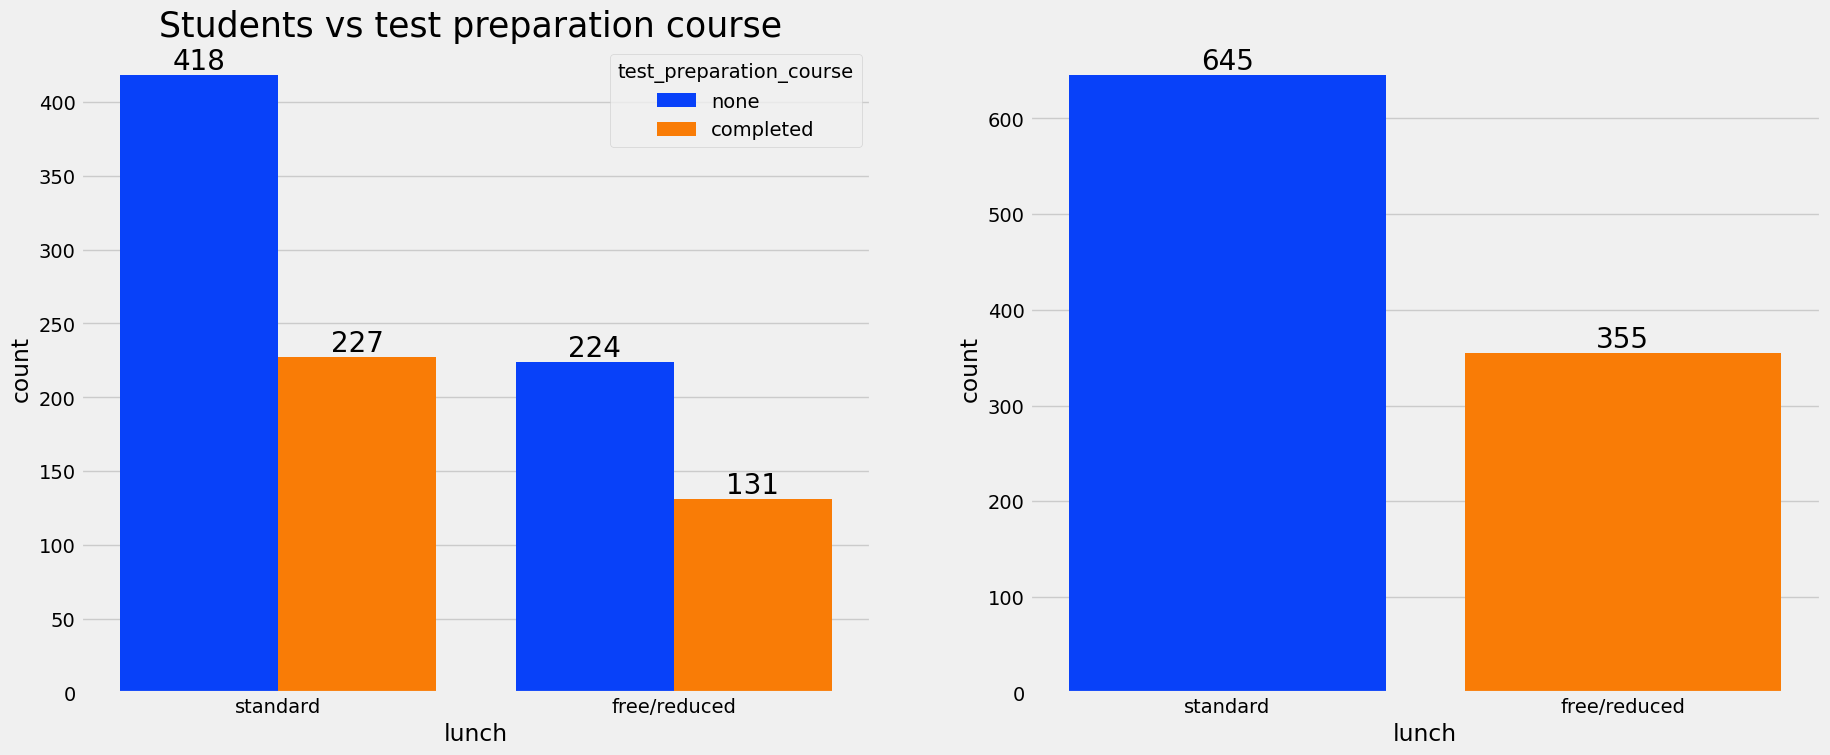

In [67]:
# Lunch type effect on students performance
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

##### Insights
- Students with standard lunch tend to perform better than those with free/reduced

##### 4.4.5 TEST PREPARATION COURSE COLUMN
- Lunch effect and test preparation impact on students performance?

<Axes: xlabel='lunch', ylabel='writing_score'>

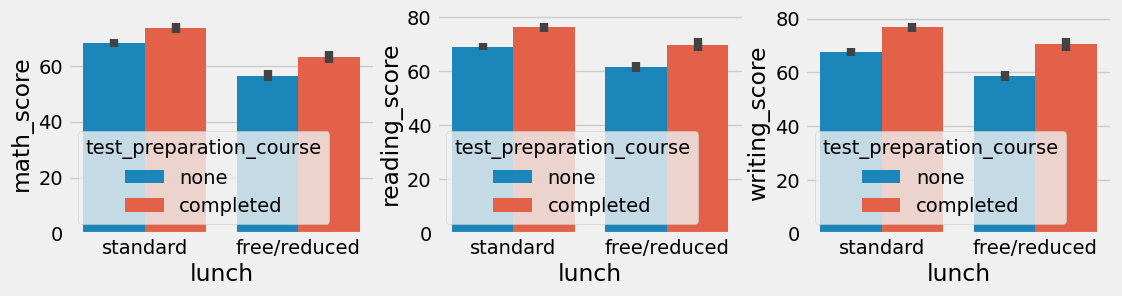

In [ ]:
# Does Lunch & Test preparation course have an impact o students performance?
plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,3,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,3,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

##### Insights
- Students who have completed the test preparation course have scores higher in all three categories than those who haven't taken the course

##### 4.4.6 CHECKING OUTLIERS

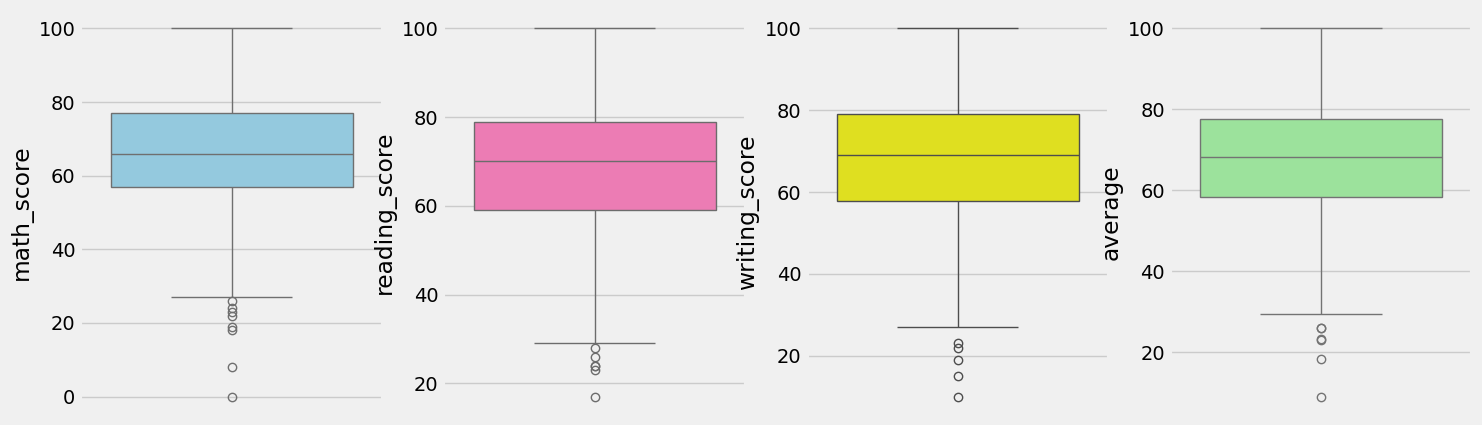

In [71]:
# Checking for outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

##### 4.4.7 MULTIVARIATE ANALYSIS USING PAIRPLOT

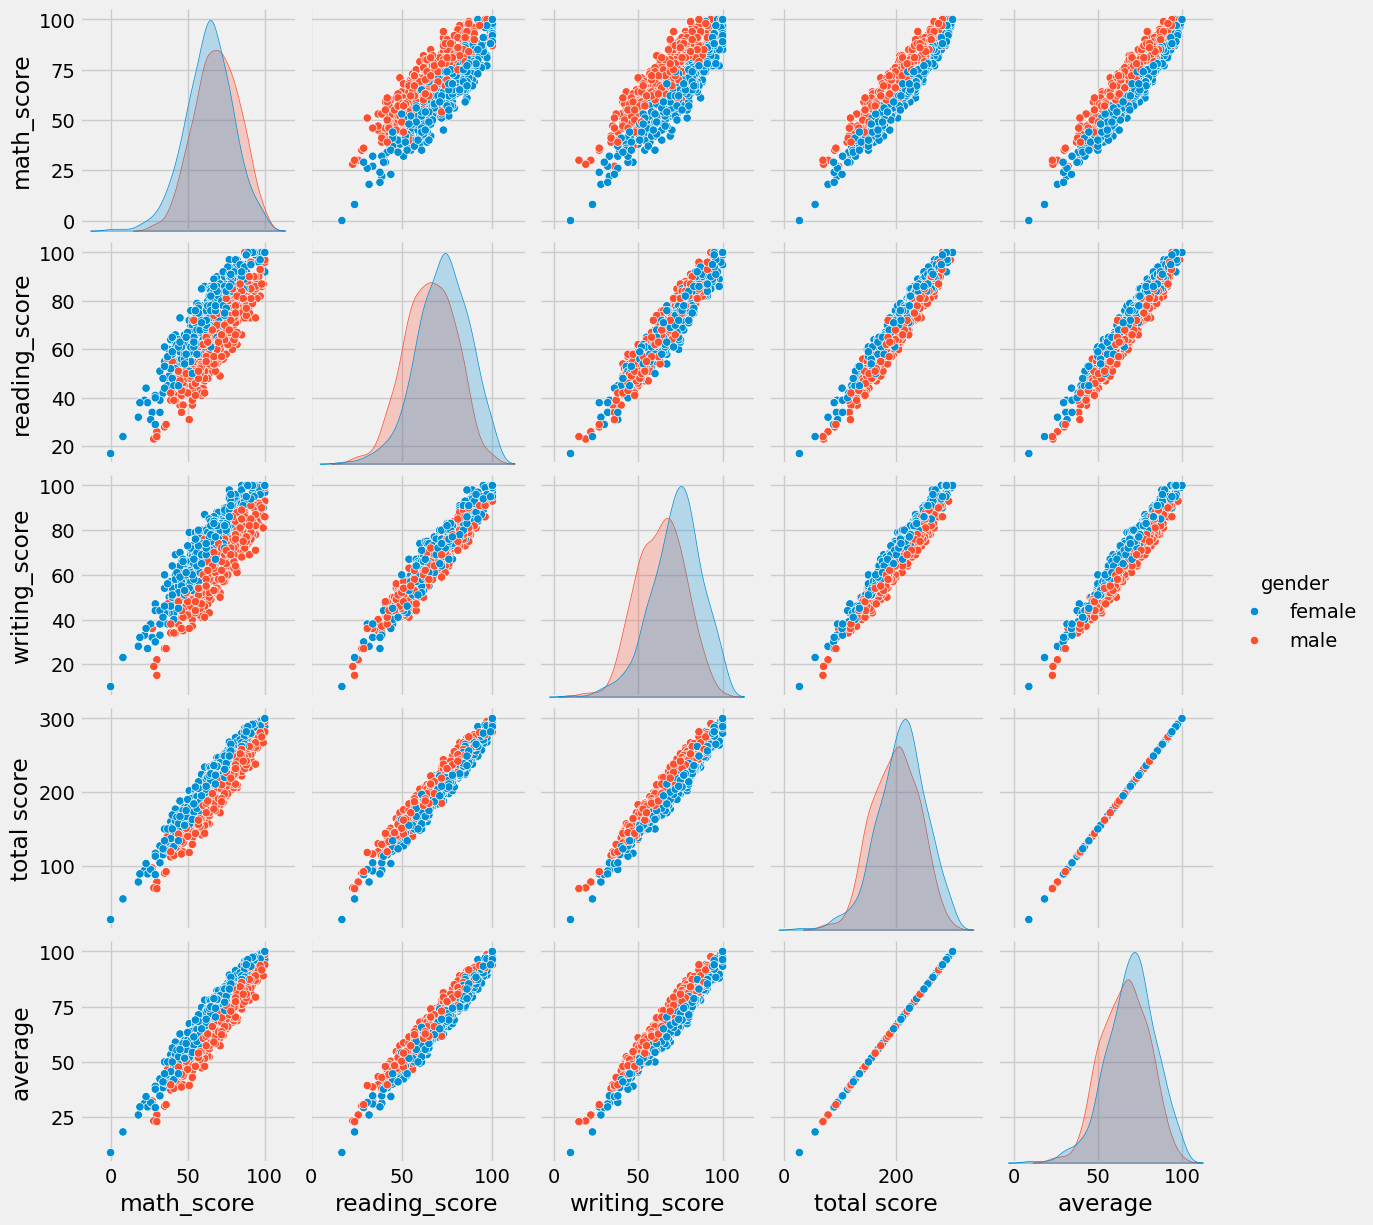

In [72]:
sns.pairplot(df,hue = 'gender')
plt.show()

##### Insights
- All the scores increase linearly with each other

#### 5. Conclusions
- Students performance is related with lunch, race, and parental level of education
- Females lead in the overall pass percentage and also are top -scorers
- Students performance is not much related with test preparation course
- Finishing preparation course is beneficial.